## Task 3-Iris Flower Classification

## Steps followed while building the ML Model:
### 1. Importing Libraries
### 2. Importing Dataset
### 3. Data Pre-processing
### 4. Exploratory Data Analysis
### 5. Model Building and Splitting
### 6. Model Training

### 1. Importing Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

### 2. Importing dataset

In [43]:
dataset = pd.read_csv("IRIS.csv")

### 3. Exploring Data

In [44]:
#Display Dataset
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
#Displaying first 5 rows of the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
#displaying last 5 rows of the dataset
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [47]:
#displaying dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
#Number of rows and columns in the dataset
dataset.shape
print(f"The dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

The dataset has 150 rows and 5 columns


In [49]:
#List of columns in the dataset
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [50]:
#Statistical Description of dataset
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
#Displaying the null values in the dataset
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### No null values are present in the dataset

### Finding the unique values in species column

In [52]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
#Displaying no. of samples for each class
dataset['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### 4. Exploratory Data Analysis

In [54]:
sb.set()

#### Plotting individual column distribution

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

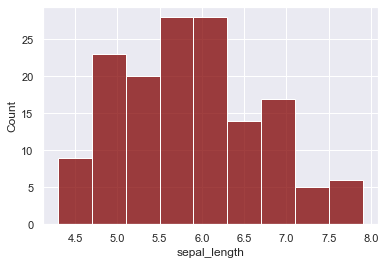

In [55]:
sb.histplot(data=dataset, x='sepal_length',color='maroon')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

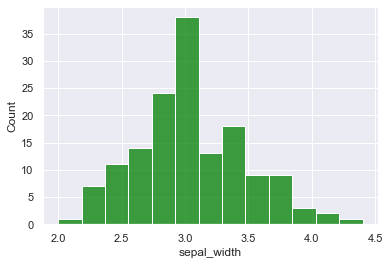

In [56]:
sb.histplot(data=dataset,x='sepal_width',color='green')

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

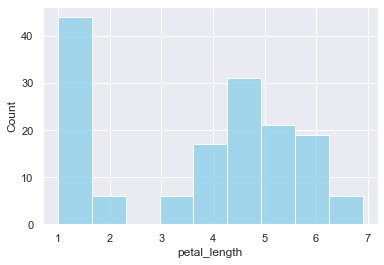

In [57]:
sb.histplot(data=dataset,x='petal_length',color='skyblue')

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

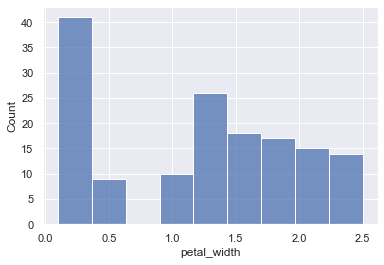

In [58]:
sb.histplot(data=dataset,x='petal_width')

Text(0.5, 1.0, 'Distribution of Iris Flower Species')

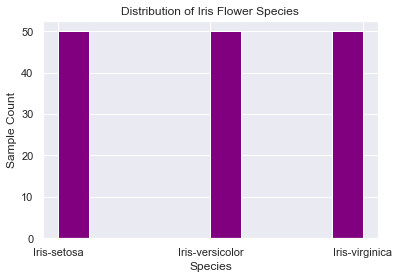

In [59]:
x=dataset['species']
mpl.hist(x,color='purple')
mpl.xlabel('Species')
mpl.ylabel('Sample Count')
mpl.title('Distribution of Iris Flower Species')

#### Plotting Relation between two parameters using Scatterplots

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

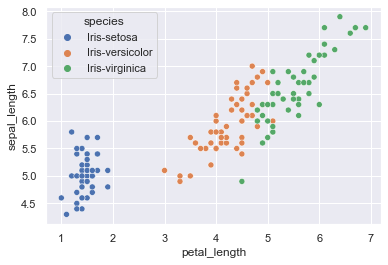

In [60]:
#Plotting Relation between Petal Length and Sepal Length
sb.scatterplot(data=dataset,x='petal_length',y='sepal_length',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

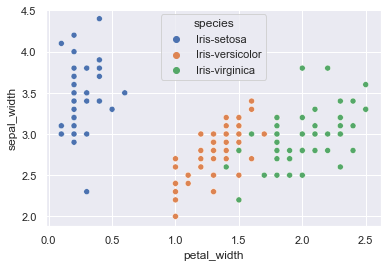

In [61]:
#Plotting graph between Petal width and sepal width
sb.scatterplot(data=dataset, x='petal_width',y='sepal_width',hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

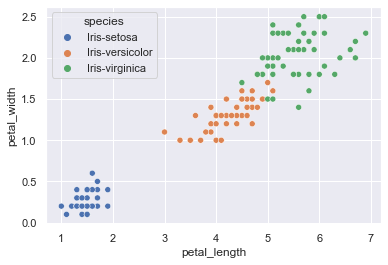

In [62]:
#Plotting graph between Petal length and petal width
sb.scatterplot(data=dataset,x='petal_length',y='petal_width', hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

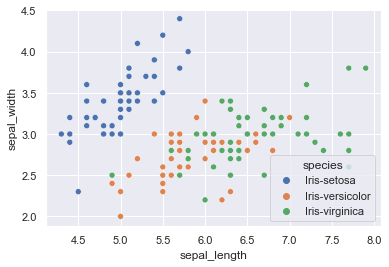

In [63]:
#Plotting graph between sepal length and sepal width
sb.scatterplot(data=dataset,x='sepal_length',y='sepal_width', hue='species')

#### Establish correlation between variables using heatmap

<AxesSubplot:>

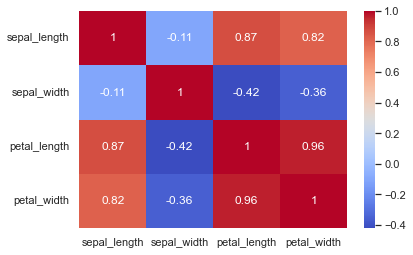

In [64]:
sb.heatmap(data=dataset.corr(),annot=True,cmap='coolwarm')

##### The diagonal values are 1. Darker shades depict higher correlation and lighter shades depict lower correlation

### 4. Model Building and Splitting

In [65]:
encode = LabelEncoder()

We encode Species column as it contains 3 categories: Iris-setosa, Iris-versicolor, Iris-virginica. To convert these categories into numeric values, we use Label Encoder.

In [66]:
dataset['species']=encode.fit_transform(dataset['species'])
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
X=dataset.drop(columns=['species'])
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [68]:
Y=dataset['species']
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [70]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


In [71]:
print(Y.shape, Y_train.shape, Y_test.shape)

(150,) (120,) (30,)


### 5. Model Training 

Since our target variable (Species) is categorical, we can use Logistic Regression to train our model

In [72]:
logistic = LR()

Performing model fitting

In [73]:
logistic.fit(X_train,Y_train)

LogisticRegression()

Evaluating Training Data

In [74]:
X_train_predict = logistic.predict(X_train)
print(X_train_predict)

[1 2 1 2 2 0 1 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0
 2 2 1 1 2 2 0 1 1 2 1 2 1 0 0 0 2 0 2 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1
 1 0 1 0 0 2 2 2 0 0 2 0 2 0 2 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0
 2 1 2 1 2 2 1 2 0]


In [75]:
X_train_accuracy = accuracy_score(Y_train,X_train_predict)
print(X_train_accuracy)

0.9833333333333333


Therefore we can see that our model shows 98% accuracy on training data

In [76]:
X_test_predict = logistic.predict(X_test)
print(X_test_predict)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


In [77]:
X_test_accuracy = accuracy_score(Y_test,X_test_predict)
print(X_test_accuracy)

0.9666666666666667


Therefore we can conclude that our model shows 96% accuracy on testing data. 

<AxesSubplot:ylabel='species'>

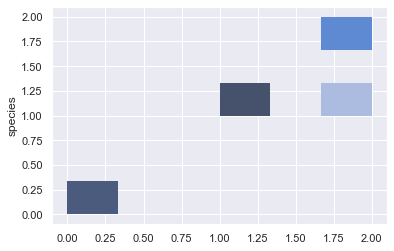

In [78]:
sb.histplot(x=X_test_predict, y=Y_test)